# Instrumental Variables

In this tutorial, we are going to see how to estimate causal effects when the treatment is not randomly assigned, but we have access to a third variable that is as good as randomly assigned and is correlated (only) with the treatment. These variables are called instrumental variables and are a powerful tool for causal inference, especially in observational studies.

**Requisites**

For this tutorial, I assume you are familiar with the following concepts:

- Rubin's potential outcome framework
- Ordinary least squares regression

**Academic Application 1**

As a first academic application, we are going to replicate [Does Compulsory School Attendance Affect Schooling and Earnings?](https://www.jstor.org/stable/2937954) (1991) by Angrist and Krueger. The authors study the effect of education on wages.

**Academic Application 2**

As a further academic application, we are going to replicate [The Colonial Origins of Comparative Development](https://economics.mit.edu/files/4123) (2002) by Acemoglu, Johnson, Robinson. The authors study the effect of institutions on economic development.

**Business Case**

As a business case, we are going to study a company that wants to find out whether subscribing to its newsletter has an effect on revenues. Since the travel agency cannot force customers to subscribing to the newsletter, it randomly sends reminder emails to infer the effect of the newsletter on revenues.

## Setting

We assume that for a set of i.i.d. subjects $i = 1, ..., n$ we observed a tuple $(X_i, T_i, Y_i)$ comprised of 

- a feature vector $X_i \in \mathbb R^n$
- a treatment variable $T_i \in \lbrace 0, 1 \rbrace$
- a response $Y_i \in \mathbb R$

Crucially, we do not assume unconfoundedness / strong ignorability hence 

$$
\big \lbrace Y_i^{(1)} , Y_i^{(0)} \big \rbrace \ \not \perp \ T_i \ | \ X_i
$$

## Instrumental Variables

The **standard linear IV model** is the following

$$
Y_i = T_i \alpha + X_i \beta_1 + \varepsilon_i
\newline
T_i = Z_i \gamma + X_i \beta_2 + u_i
$$

We assume there exists an **instrumental variable** $Z_i \in \mathbb R^k$ that satisfies the following assumptions.

- **Assumption 1: Exclusion**: $\mathbb E [Z \varepsilon] = 0$

- **Assumption 2: Relevance**: $\mathbb E [Z T] \neq 0$

The model can be represented by a DAG.

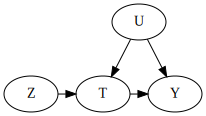

In [1]:
from src.plots import dag_iv
dag_iv()

The IV estimator is instead unbiased

$$
\hat \beta_{IV} = (Z'X)^{-1}(Z'Y)
$$

### Potential Outcomes Perspective

We need to extend the potential outcomes framework in order to allow for the instrumental variable $Z$. First we define the potential outcomes as $Y^{(D(Z_i))}(Z_i)$

The assumptions become

- Exclusion: $Y^{(D(Z_i))}(Z_i) = Y^{(T(Z_i))}$
- Relevance: $P(z) = \mathbb E [T, Z=z]$

We assume that $Z$ is fully randomly assigned (while $T$ is not).

What does IV estimate?

$$
\begin{aligned}
\mathbb E[Y_i | Z_i = 1] - \mathbb E[Y_i | Z_i = 0] &= \Pr (D_i^{(1)} - D_i^{(0)} = 1) \times \mathbb E \Big[ Y_i^{(1)} - Y_i^{(0)} = 1 \ \Big | \ D_i^{(1)} - D_i^{(0)} = 1 \Big] - 
\newline
&- \Pr (D_i^{(1)} - D_i^{(0)} = -1) \times \mathbb E \Big[ Y_i^{(1)} - Y_i^{(0)} = 1 \ \Big | \ D_i^{(1)} - D_i^{(0)} = -1 \Big]
\end{aligned}
$$

Is this a quantity of interest? Almost. There are **two issues**.

First, the first term is the treatment effect, but only for those individuals for whom $D_i^{(1)} - D_i^{(0)} = 1$, i.e. those that are induced into treatment by $Z_i$. These individuals are referred to as **compliers**. 

Second, the second term is problematic since it removes from the first effect, the local effect of another subpopulation: $D_i^{(1)} - D_i^{(0)} = -1$, i.e. those that are induced out of treatment by $Z_i$. These individuals are referred to as **defiers**. 

We can get rid of defiers with a simple assumption.

**Assumption 3: monotonocity**: $D_i^{(1)} \geq D_i^{(0)}$ (or viceversa)

- All effects must be monotone in the same direction
- Fundamentally untestable

Then, the IV estimator can be expressed as a ration between two differences in means

$$
\hat \beta_{IV} = \frac{\mathbb E[Y_i | Z_i = 1] - \mathbb E[Y_i | Z_i = 0]}{\mathbb E[T_i | Z_i = 1] - \mathbb E[T_i | Z_i = 0]}
$$

### Structural Perspective

One can interpret the IV estimator as a GMM estimator that uses the exclusion restriction as estimating equation.

$$
\hat \beta_{GMM} = \arg \min_{\beta} \mathbb E \Big[ Z (Y - \alpha T - \beta X) \Big]^2
$$

## The Algebra of IV

TBD

## Demand and Supply

TBD

## Academic Application 1

As an research paper replication, we are going to replicate [Does compulsory school attendance affect schooling and earnings?](https://www.jstor.org/stable/2937954) (1991) by Angrist and Krueger. The authors study the effect of education on wages.

The **problem** of studying the relationship of education on wages is that there might be factors that influence both education and wages but we do not observe, for example ability. Students that have higher ability might decide to stay longer in school and also get higher wages afterwards. 

The **idea** of the authors is to use the quarter of birth as an instrument for education. In fact, quarter of birth is plausibly exogenous with respect to wages while, on the other hand, is correlated with education. Why? Students that are both in the last quarter of the year cannot drop out as early as other students and therefore are exposed to more eduction.

We can represent the DAG of their model as follows.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from src.utils import *

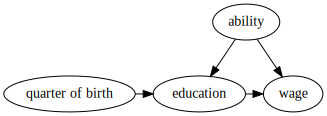

In [4]:
dag_iv(Y="wage", T="education", Z="quarter of birth", U="ability")

A shortcoming of this instrument comes out of the fact that the population of **compliers** is students that drop out of school as soon as possible, we will know the treatment effect only for this population. It's important to keep this in mind when interpreting the results.

Let's load the data, freely available [here](https://economics.mit.edu/faculty/angrist/data1/data/angkru1991).

In [5]:
df = pd.read_csv('data/ak91.csv')
df.head()

,log_wage,years_of_schooling,date_of_birth,year_of_birth,quarter_of_birth,state_of_birth
0,5.790019,12.0,1930.0,1930.0,1.0,45.0
1,5.952494,11.0,1930.0,1930.0,1.0,45.0
2,5.315949,12.0,1930.0,1930.0,1.0,45.0
3,5.595926,12.0,1930.0,1930.0,1.0,45.0
4,6.068915,12.0,1930.0,1930.0,1.0,37.0


We have the variables of interest, `log_wage`, `years_of_schooling` and `quarter_of_birth`, together with a set of controls.

### OLS

If we were to ignore the endogeneity problem we would estimate a linear regression of `log_wage` on `years_of_schooling`, plus control dummy variables for the `state_of_birth` and `year_of_birth`.

In [6]:
smf.ols('log_wage ~ years_of_schooling', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.9952,0.004,1118.882,0.000,4.986,5.004
years_of_schooling,0.0709,0.000,209.243,0.000,0.070,0.072


### IV

We now use `quarter_of_birth` as an instrument for `years_of_schooling`. We cannot check the exclusion restriction condition, but we can check the **relevance** condition.

Let's start first by plotting average `years_of_schooling` by date of birth.

In [7]:
group_df = df.groupby("date_of_birth").mean().reset_index()

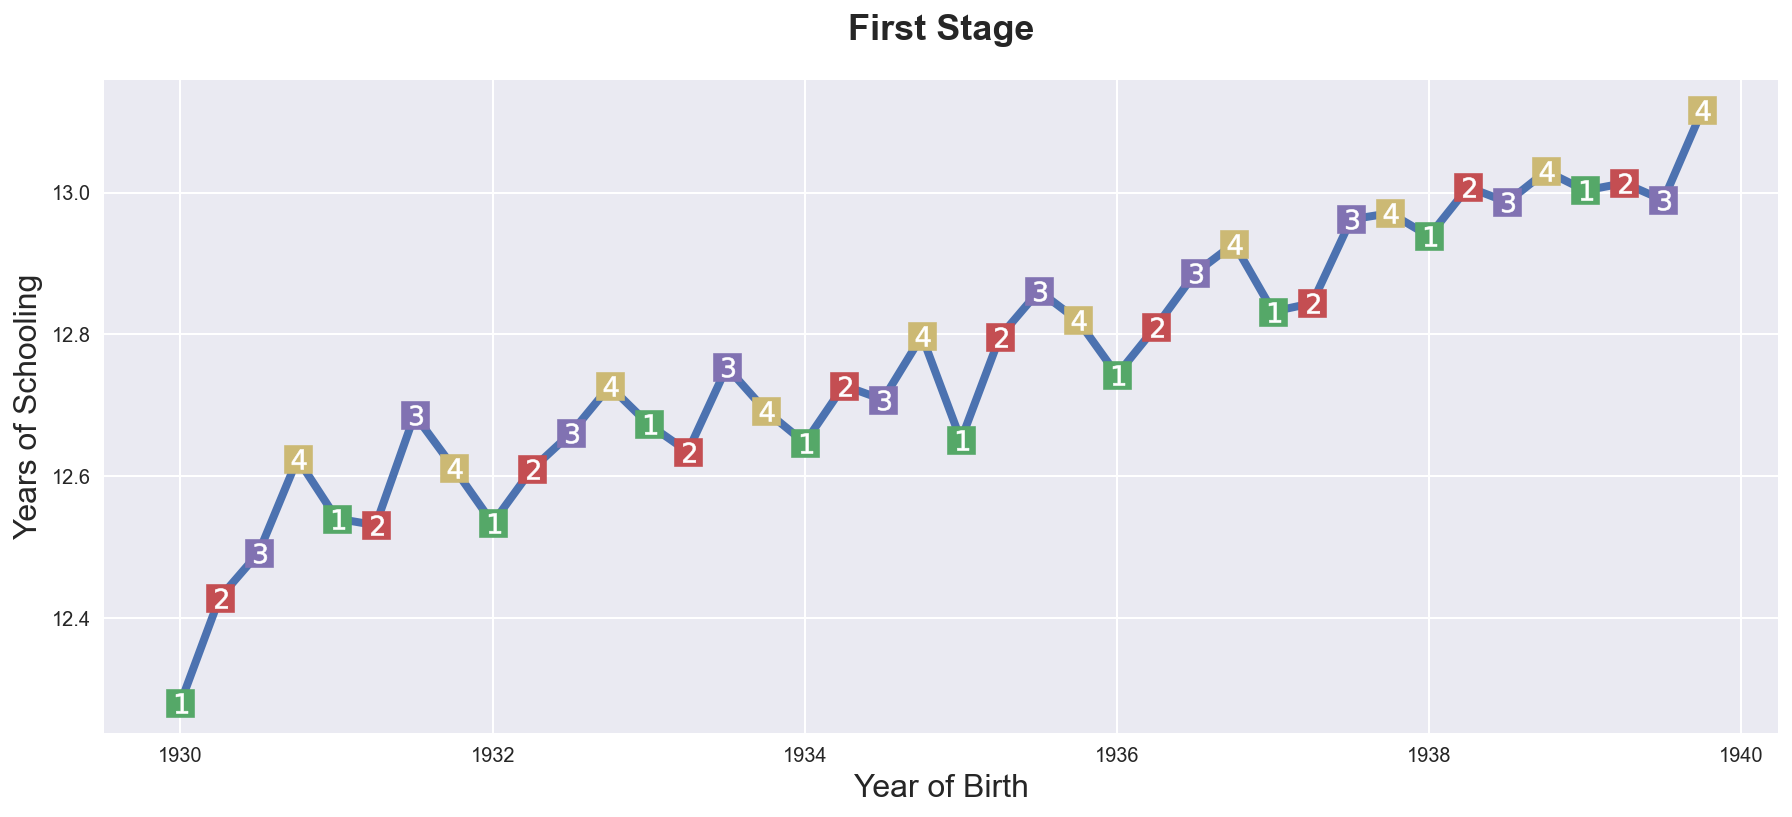

In [8]:
plt.figure(figsize=(15,6))
sns.lineplot(data=group_df, x="date_of_birth", y="years_of_schooling", zorder=1)\
.set(title="First Stage", xlabel="Year of Birth", ylabel="Years of Schooling");

for q in range(1, 5):
    x = group_df.loc[group_df['quarter_of_birth']==q, "date_of_birth"]
    y = group_df.loc[group_df['quarter_of_birth']==q, "years_of_schooling"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

As we can see, there is an upward trend but, within each year, people both in the last quarter usually have more years of schooling than people born in other quarters of the year. 

We can check this correlation more formally by regressing `years_of_schooling` of a set of dummies for `quarter_of_birth`.

In [9]:
smf.ols('years_of_schooling ~ C(quarter_of_birth)', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.6881,0.011,1105.239,0.000,12.666,12.711
C(quarter_of_birth)[T.2.0],0.0566,0.016,3.473,0.001,0.025,0.089
C(quarter_of_birth)[T.3.0],0.1173,0.016,7.338,0.000,0.086,0.149
C(quarter_of_birth)[T.4.0],0.1514,0.016,9.300,0.000,0.119,0.183


The relationship between `years_of_schooling` and `quarter_of_birth` is indeed statistically significant. 

Does it translate it into higher wages? We can have a first glimpse of potential IV effects by plotting wages against the date of birth.

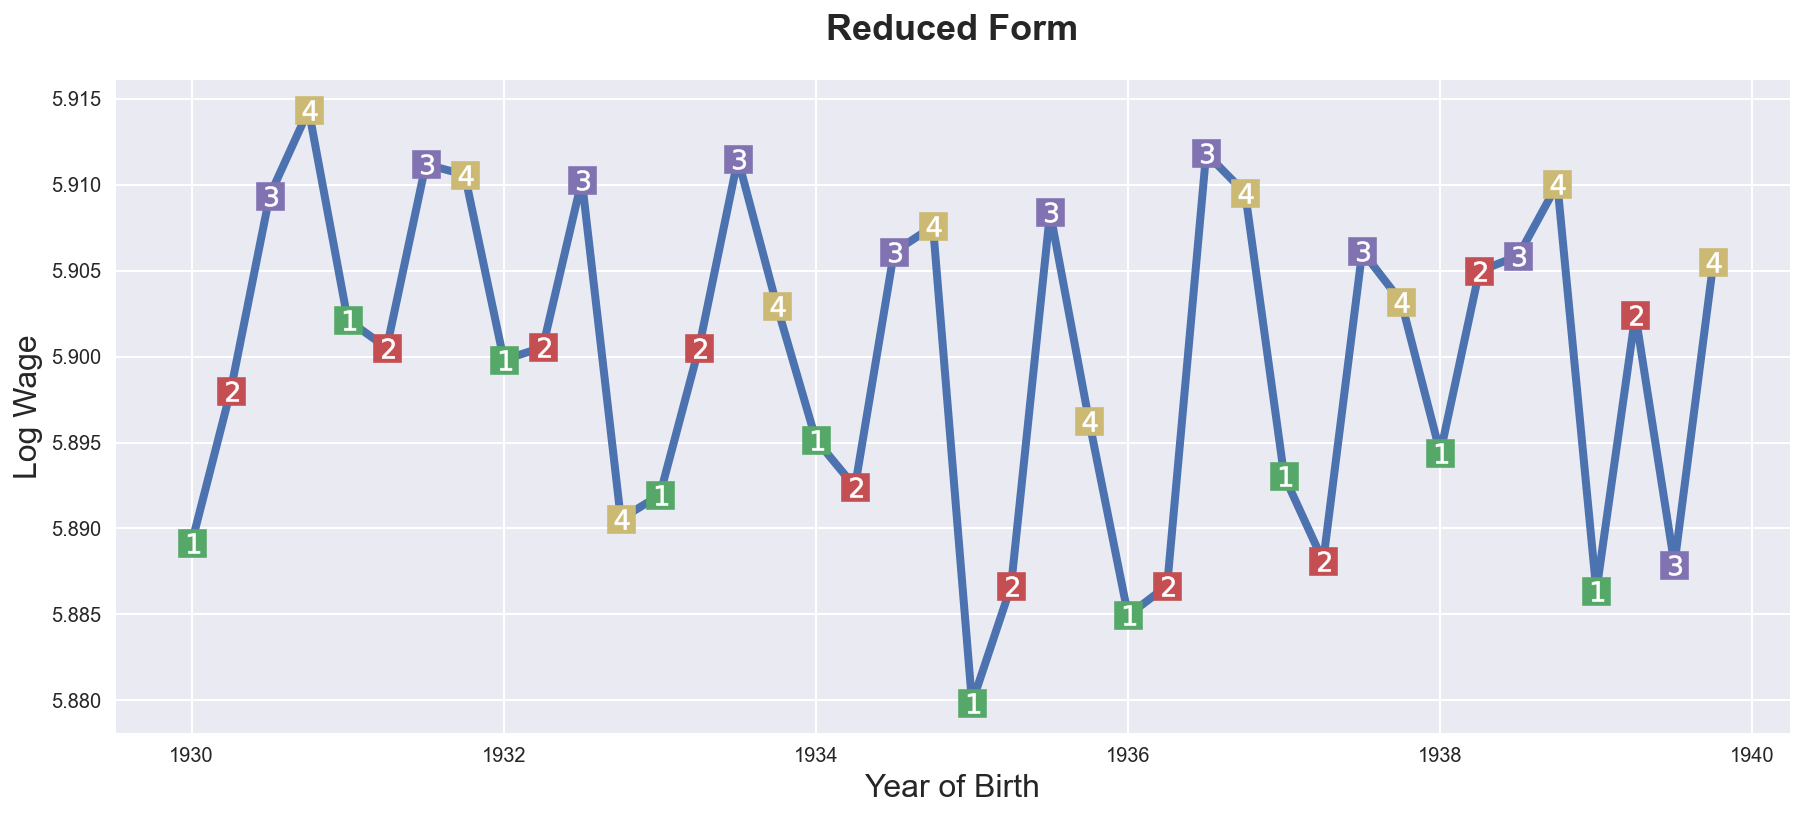

In [10]:
plt.figure(figsize=(15,6))
sns.lineplot(data=group_df, x="date_of_birth", y="log_wage", zorder=1)\
.set(title="Reduced Form", xlabel="Year of Birth", ylabel="Log Wage");

for q in range(1, 5):
    x = group_df.loc[group_df['quarter_of_birth']==q, "date_of_birth"]
    y = group_df.loc[group_df['quarter_of_birth']==q, "log_wage"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

It seems that indeed people both in later quarters earn higher wages later in life.

We now turn into the estimation of the causal effect of education on wages. 

In [11]:
df[['q1', 'q2', 'q3', 'q4']] = pd.get_dummies(df['quarter_of_birth'])

In [12]:
from linearmodels.iv import IV2SLS

IV2SLS.from_formula('log_wage ~ 1 + [years_of_schooling ~ q1 + q2 + q3]', data=df).fit().summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,4.5898,0.2494,18.404,0.0000,4.1010,5.0786
years_of_schooling,0.1026,0.0195,5.2539,0.0000,0.0643,0.1409


The coefficient is slightly higher than the OLS coefficient. It's important to remember that the estimated effect is specific to the subpopulation of people that drop out of school as soon as they can.

## Research Paper Replication 2

In [The Colonial Origins of Comparative Development](https://economics.mit.edu/files/4123) (2002) by Acemoglu, Johnson, Robinson, the authors wish to determine whether or not differences in institutions can help to explain observed economic outcomes.

How do we measure *institutional differences* and *economic outcomes*?

In this paper,

- economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates.  
- institutional differences are proxied by an index of protection against expropriation on average over 1985-95, constructed by the [Political Risk Services Group](https://www.prsgroup.com/).  

The **problem** is that there might exist other factors that affects both the quality of institutions and GDP. The authors suggest the following problems as sources of endogeneity:

- richer countries may be able to afford or prefer better institutions  
- variables that affect income may also be correlated with institutional differences  
- the construction of the index may be biased; analysts may be biased towards seeing countries with higher income having better institutions  

The **idea** of the authors is to use settler's mortality during the colonization period as an instrument for the quality of institutions. They hypothesize that higher mortality rates of colonizers led to the establishment of institutions that were more extractive in nature (less protection against expropriation), and these institutions still persist today.

We can represent their DAG as follows.

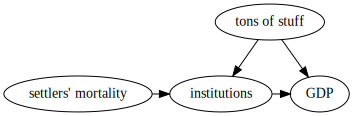

In [13]:
dag_iv(Y="GDP", T="institutions", Z="settlers' mortality", U="tons of stuff")

First, let's load the data (available [here](https://economics.mit.edu/faculty/acemoglu/data/ajr2001)) and have a look at it.

In [14]:
df = pd.read_csv('data/ajr02.csv',index_col=0)
df.head()

,GDP,Exprop,Mort,Latitude,Neo,Africa,Asia,Namer,Samer,logMort,Latitude2
1,8.39,6.50,78.20,0.3111,0,1,0,0,0,4.359270,0.096783
2,7.77,5.36,280.00,0.1367,0,1,0,0,0,5.634790,0.018687
3,9.13,6.39,68.90,0.3778,0,0,0,0,1,4.232656,0.142733
4,9.90,9.32,8.55,0.3000,1,0,0,0,0,2.145931,0.090000
5,9.29,7.50,85.00,0.2683,0,0,0,1,0,4.442651,0.071985


The data contains the main variables, `DGP`, `Exprop` and `Mort`, plus some geographical information.

### OLS

What would we get if we were to ignore the endogeneity problem? We estimate the following misspecified model by OLS

$$
{GDP}_i = \beta_0 + \beta_1 {Exprop}_i + \varepsilon_i
$$


In [15]:
reg1 = smf.ols('GDP ~ Exprop', df).fit()
reg1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.6609,0.409,11.402,0.000,3.844,5.478
Exprop,0.5220,0.061,8.527,0.000,0.400,0.644


The coefficient of `Exprop` is positive and significant but we know it is a biased estimate of the causal effect. 

One direction we could take in addressing the endogeneity problem could be to control for any factor that affects both `GDP` and `Exprop`. In particular, the authors consider the following sets of variables:

- climat; proxied by latitude  
- differences that affect both economic performance and institutions, eg. cultural, historical, etc.; controlled for with the use of continent dummies  

In [16]:
reg2 = smf.ols('GDP ~ Exprop + Latitude + Latitude2', df).fit()
reg3 = smf.ols('GDP ~ Exprop + Latitude + Latitude2 + Asia + Africa + Namer + Samer', df).fit()

In [17]:
from statsmodels.iolib.summary2 import summary_col

summary_col(results=[reg1,reg2,reg3],
            float_format='%0.2f',
            stars = True,
            info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"},
            regressor_order=['Intercept','Exprop','Latitude','Latitude2'])

,GDP I,GDP II,GDP III
Intercept,4.66***,4.55***,5.95***
,(0.41),(0.45),(0.68)
Exprop,0.52***,0.49***,0.40***
,(0.06),(0.07),(0.06)
Latitude,,2.16,0.42
,,(1.68),(1.47)
Latitude2,,-2.12,0.44
,,(2.86),(2.48)
Africa,,,-1.06**
,,,(0.41)


The coefficient of `Expropr` decreases in magnitude but remains positive and significant after the addition of geographical control variables. This might suggest that the endogeneity problem is not very pronounced. However, it's hard to say given the large number of factors that could affect both institutions and GDP.

### IV

In order for `Mort` to be a valid instrument it needs to satisfy the two IV conditions:

1. **Exclusion**: `Mort` must be correlated to `GDP` only through `Exprop`
2. **Relevance**: `Mort` must be correlated with `Exprop`

The **exclusion restriction** condition is untestable, however, we may not be satisfied if settler mortality rates in the 17th to 19th centuries have a direct effect on current GDP (in addition to their indirect effect through institutions).

For example, settler mortality rates may be related to the current disease environment in a country, which could affect current economic performance.

The authors argue this is unlikely because:

- The majority of settler deaths were due to malaria and yellow fever and had a limited effect on local people.  
- The disease burden on local people in Africa or India, for example, did not appear to be higher than average, supported by relatively high population densities in these areas before colonization.  

The **relevance** condition is testable and we can check it by computing the partial correlation between `Mort` and `Exprop`. Let's start by visual inspection first.

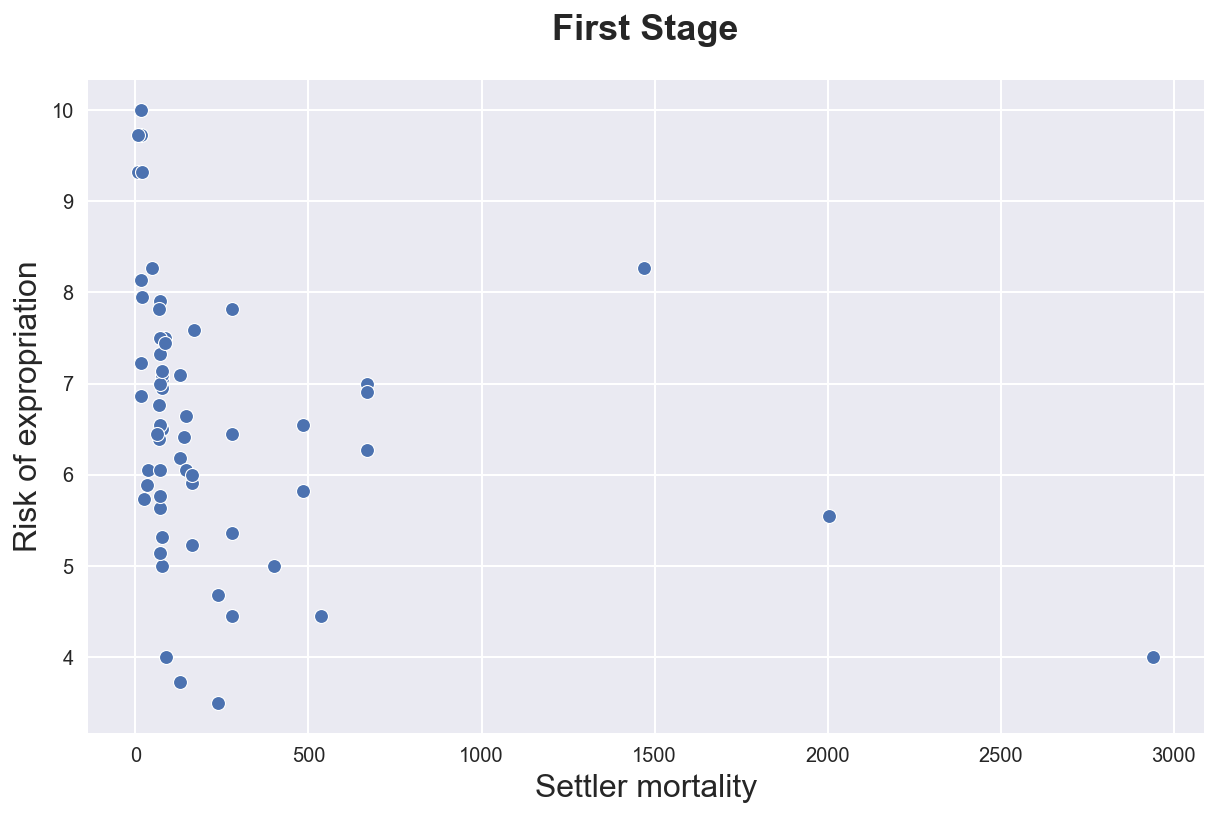

In [18]:
sns.scatterplot(data=df, x='Mort', y='Exprop')\
.set(title='First Stage',
    xlabel='Settler mortality',
    ylabel='Risk of expropriation');

Visually, the first stage seems weak, at best. However, a regression of `Exprop` on `Mort` can help us better assess whether the relationship is significant or not.

In [19]:
smf.ols('Exprop ~ Mort', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7094,0.202,33.184,0.000,6.305,7.114
Mort,-0.0008,0.000,-2.059,0.044,-0.002,-2.28e-05


The coefficient is negative, as expected, and statistically significant.

The second-stage regression results give us an unbiased and consistent estimate of the effect of institutions on economic outcomes.

$$
{GDP}_i = \beta_0 + \beta_1 {Exprop}_i + \varepsilon_i \\
{Exprop}_i = \delta_0 + \delta_1 {logMort}_i + v_i
$$



Note that while our parameter estimates are correct, our standard errors
are not and for this reason, computing 2SLS ‘manually’ (in stages with
OLS) is not recommended.

We can correctly estimate a 2SLS regression in one step using the
[linearmodels](https://github.com/bashtage/linearmodels) package, an extension of `statsmodels`

Note that when using `IV2SLS`, the exogenous and instrument variables
are split up in the function arguments (whereas before the instrument
included exogenous variables)

In [20]:
IV2SLS.from_formula('GDP ~ 1 + [Exprop ~ logMort]', data=df).fit().summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,2.0448,1.1273,1.8139,0.0697,-0.1647,4.2542
Exprop,0.9235,0.1691,5.4599,0.0000,0.5920,1.2550


The result suggests a stronger positive relationship than what the OLS results indicated.

## Business Case

We are given the following problem:

> A firm would like to understand whether its newsletter is working to increase revenue. However, it cannot force customers to subscribe to the newsletter. Instead, the firm sends a reminder email to a random sample of customers for the newsletter. Estimate the effect of the newsletter on revenue.

We start by drawing a sample from the data generating process.

In [1]:
from src.dgp import dgp_newsletter

dgp = dgp_newsletter()
df = dgp.generate_data()
df.head()

,reminder,subscribe,revenue
0,0,1,0.582809
1,1,0,3.427162
2,0,0,1.953731
3,0,0,2.902038
4,0,0,0.826724


From the data, we know the `revenue` per customer, whether it was sent a `reminder` for the newsletter and whether it actually decided to `subscribe`.

If we to estimate the effect of `subscribe` on `revenue`, we might get a biased estimate because the decision of subscribing is endogenous. For example, we can imagine that wealthier customers are generating more revenue but are also less likely to subscribe.

We can represent the model with a DAG.

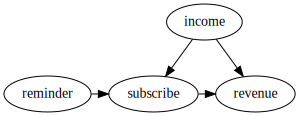

In [23]:
dag_iv(Y="revenue", T="subscribe", Z="reminder", U="income")

### OLS

By directly inspecting the data, it seems that subscribed members actually generate less revenue than normal customers.

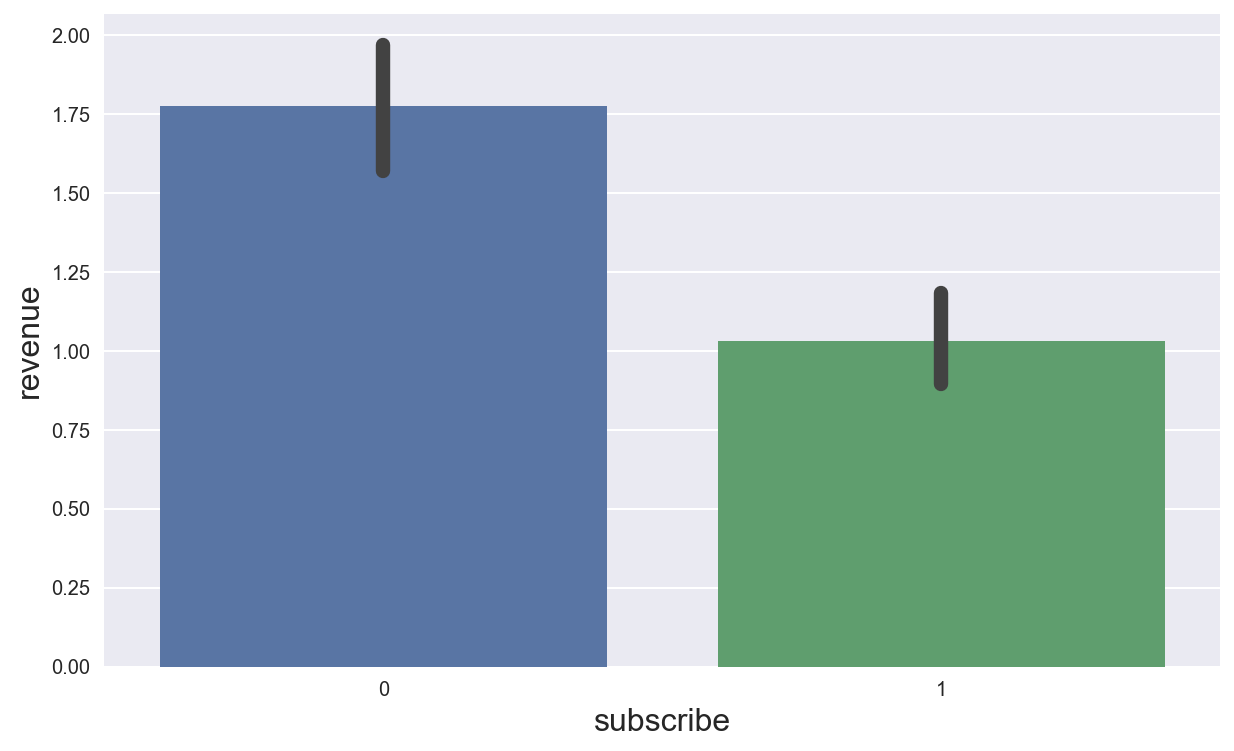

In [24]:
sns.barplot(x='subscribe', y='revenue', data=df);

A linear regression confirms the graphical intuition.

In [25]:
smf.ols('revenue ~ 1 + subscribe', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.7752,0.086,20.697,0.000,1.607,1.943
subscribe,-0.7441,0.140,-5.334,0.000,-1.018,-0.470


However, if indeed wealthier customers generate more revenue and are less likely to subscribe, we have a negative omitted variable bias and we can expect the true effect of the newsletter to be bigger than the OLS estimate.

### IV

Let's now exploit the random variation induced by the discount. In order for our instrument to be valid, we need it to be exogenous (untestable) and relevant. We can test the relevance with the **first stage** regresssion of `reminder` on `subscribe`.

In [26]:
smf.ols('subscribe ~ 1 + reminder', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2368,0.021,11.324,0.000,0.196,0.278
reminder,0.2790,0.029,9.488,0.000,0.221,0.337


It seems that the instrument is relevant. We can now estimate the IV regression.

In [27]:
IV2SLS.from_formula('revenue ~ 1 + [subscribe ~ reminder]', data=df).fit().summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,0.9485,0.2147,4.4184,0.0000,0.5278,1.3693
subscribe,1.4428,0.5406,2.6689,0.0076,0.3832,2.5023


The estimated coefficient has now flipped sign and turned positive! Ignoring the endogeneity problem would have lead us to the wrong conclusion.

## References

- [Instrumental Variables](https://www.youtube.com/watch?v=LEAx0He_KBI) video lecture by Paul Goldsmith-Pinkham (Yale)
- [Instrumental Variables](https://matheusfacure.github.io/python-causality-handbook/08-Instrumental-Variables.html) section from Matheus Facure's [Causal Inference for The Brave and The True](https://matheusfacure.github.io/python-causality-handbook/)
- [Does compulsory school attendance affect schooling and earnings?](https://www.jstor.org/stable/2937954) (1991) by Angrist and Krueger
- [The Colonial Origins of Comparative Development](https://economics.mit.edu/files/4123) (2002) by Acemoglu, Johnson, Robinson